# Preguntas del enunciado

$C_{ij} = 
\begin{cases}
    -n_{ij} \hspace{1.4cm} i \neq j\\
    2 + n_{i} \hspace{1cm} i = j
\end{cases}
$

## 1. ¿Qué tipo de matriz resulta C?

La matriz de Colley resulta: 
1. **simétrica** [[1]](#1)  
    $C_{ij} = C_{ji}$ ya que la cantidad de partidos jugados entre $i,j$ es la misma que $j,i$. Luego $C = C^{t}$


2. **diagonal dominante**  
    Por definición la matriz tiene en la diagonal los partidos jugados por el equipo $i$ ($n_i$) y en el resto los partidos jugados entre los equipos $i$, $j$ ($n_{ij}$).  
    Trivialmente pordemos ver que $n_{ij} \leq n_i$ ya que $\sum_{j \neq i}n_{ij} = n_i$  
    Luego $|C_{ii}| \geq \sum_{j \neq i}|C_{ji}| \ \ \forall i, j $

## 2. ¿Cómo se garantiza la aplicabilidad de EG sin intercambio de filas o columnas?

La matriz de Colley es una **matriz diagonal dominante**, luego según podemos ver en [[2]](#2) una propiedad de estas matrices es que no necesitan permutaciones para aplicar EG. **TODO: explicar esto mejor y (quizás) buscar una fuente que no sea wikipedia**

## 3. ¿Qué se puede decir sobre la estabilidad de los cálculos?

Que pueden llegar a ser muy inestables, debido a la aritmética finita de la computadora[3].
**TODO: PONER EJEMPLO DE CUANDO PASA**

## justificación de por qué funciona correctamente EG
Además, sabemos que existen casos donde el algoritmo EG no puede encontrar una
solución. Se debe incluir en el desarrollo una justificación sobre por qué el algoritmo
funciona correctamente en el caso del método CMM.

## Referencias
<a id="1">[1]</a> 
**Colley’s Bias Free College Football Ranking Method**, Wesley N. Colley (2002) Princeton University.

<a id="2">[2]</a> 
**<a href="https://en.wikipedia.org/wiki/Diagonally_dominant_matrix#Applications_and_properties">Wikipedia, Diagonally dominant Matrix</a>**

<a id="3">[3]</a> 
**<a href="https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html">What Every Computer Scientist Should Know About Floating-Point Arithmetic</a>** David Goldberg (1991)

# Codigo

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.utils import listfiles
from subprocess import *

%matplotlib inline

In [44]:
dataDirectory = "../data/" #.dat files
testsDirectory = "tests/" #.in files

executable = "./tp"

In [66]:
def runTp(input, output, algor):
    check_call([executable, input, output] + [algor], stdin=None, stdout=PIPE, stderr=PIPE)
    
def dataFiles():
    return list(listfiles(dataDirectory, "*.dat"))
        
def testsFiles():
    return list(listfiles(testsDirectory, "*.in"))

### correr todos los casos para todos los algoritmos

In [71]:
#build
!python3 metnum.py build

opcionesAlgoritmos = [('CMM', '0'), ('WP', '1')]

for name, op in opcionesAlgoritmos:
    for finput in dataFiles() + testsFiles():
        foutput = finput.replace(".dat", f".out").replace(".in", f"{}.out")
        runTp(finput, foutput, op)

# Experimentación

## Error absoluto por aritmética finita

**test1** 
mean:0.28049645026524833, median:0.27712765336036493, var:0.03294736693357335

diferencias (1ras 5)
 [[0.15412232]
 [0.00119683]
 [0.52420211]
 [0.18816489]
 [0.44920214]]


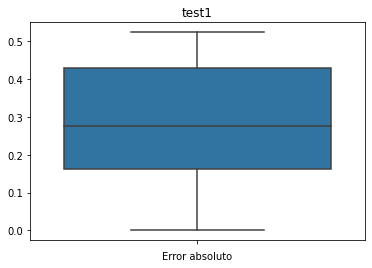

**test2** 
mean:0.17362987995147663, median:0.10571867999649001, var:0.03339453656351502

diferencias (1ras 5)
 [[0.02637367]
 [0.36597842]
 [0.00199376]
 [0.18506369]
 [0.00154382]]


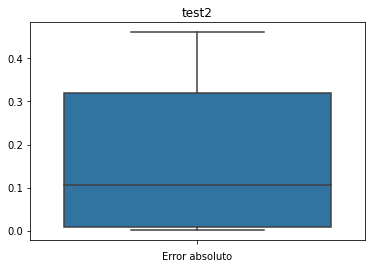

**test-prob-2** 
mean:0.1955362009725583, median:0.15579982155990502, var:0.026232946367796883

diferencias (1ras 5)
 [[0.08444966]
 [0.01745335]
 [0.38049795]
 [0.03754116]
 [0.22714998]]


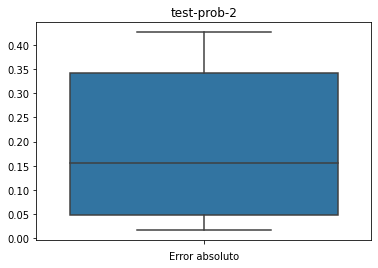

**test-prob-1** 
mean:0.24586289046350998, median:0.27052745223045, var:0.02408121851381548

diferencias (1ras 5)
 [[0.08367352]
 [0.02978522]
 [0.37989427]
 [0.18590266]
 [0.44076942]]


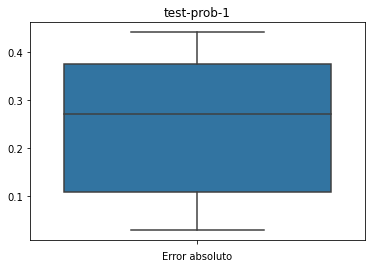

**test_completo_1000_2** 
mean:0.00014783484324052087, median:0.0001240433563849952, var:1.2827871816216632e-08

diferencias (1ras 5)
 [[1.21625829e-04]
 [8.32627987e-05]
 [1.01181266e-04]
 [1.42712755e-04]
 [7.87464786e-05]]


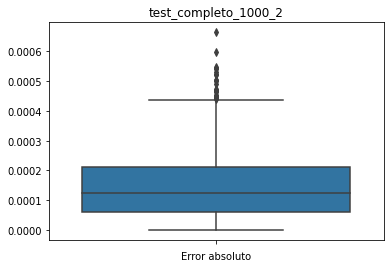

**test_completo_100_4** 
mean:0.002223229173604895, median:0.0017905651633750297, var:2.7842619414452823e-06

diferencias (1ras 5)
 [[0.00195965]
 [0.00201691]
 [0.00249318]
 [0.00107581]
 [0.00114319]]


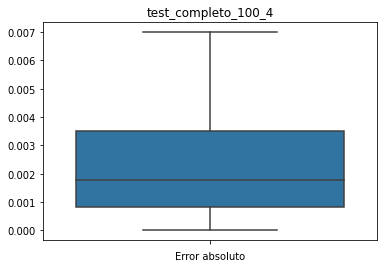

**test_completo_100_8** 
mean:0.002458580514952394, median:0.0018897944029499514, var:3.928459009445376e-06

diferencias (1ras 5)
 [[0.00127652]
 [0.00091015]
 [0.00079607]
 [0.00100784]
 [0.00373342]]


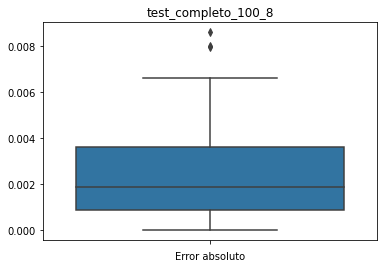

**test_completo_10_1** 
mean:0.027778170226956056, median:0.013889338397400058, var:0.0006558588556385387

diferencias (1ras 5)
 [[0.01388933]
 [0.01388934]
 [0.04166701]
 [0.01388934]
 [0.01388933]]


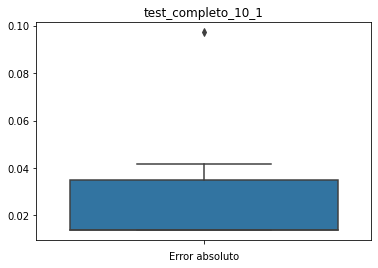

**test_completo_1000_8** 
mean:0.00023815971876753954, median:0.00019529397582002117, var:3.248159341762632e-08

diferencias (1ras 5)
 [[2.82045985e-04]
 [5.60867186e-04]
 [5.20191952e-05]
 [3.17350896e-04]
 [2.90533405e-04]]


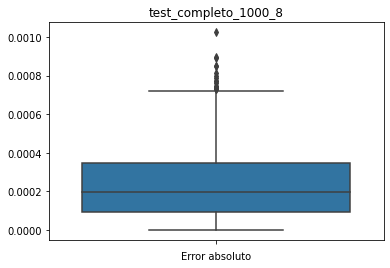

In [75]:
for finput in testsFiles():
    expected = pd.read_table(finput.replace(".in", ".expected"), names = ["expected"])
    output = pd.read_table(finput.replace(".in", ".out"), names = ["output"])

    data = pd.concat([expected, output], axis=1)
    dif = np.absolute(np.array(expected) - np.array(output))

    testname = finput.split("/")[-1].replace(".in", "")

    print(f"**{testname}** \nmean:{dif.mean()}, median:{np.median(dif)}, var:{dif.var()}")
    print("\ndiferencias (1ras 5)\n", dif[:5])

    sns.boxplot(y=dif)
    plt.title(testname)
    plt.xlabel("Error absoluto")
    plt.show()
        